In [50]:
import numpy as np
import matplotlib.pyplot as plt   
import pandas as pd

In [51]:
df = pd.read_csv('dhakahomeprices.csv')

In [52]:
df

,area,price
0,2600,55000
1,3000,56500
2,3200,61000
3,3600,68000
4,4000,72000
5,2500,40000
6,2700,38000
7,1200,17000


# **Plot Dataset**

Text(0.5, 1.0, 'Homeprices in Dhaka')

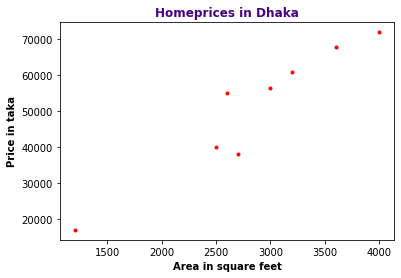

In [53]:
plt.scatter(df['area'],df['price'],color='red',marker='.')
plt.xlabel('Area in square feet',weight='bold')
plt.ylabel('Price in taka',weight='bold')
plt.title('Homeprices in Dhaka',color='indigo',weight='bold')


In [54]:
x=df[['area']]
y=df[['price']]

In [55]:
x,y

(   area
 0  2600
 1  3000
 2  3200
 3  3600
 4  4000
 5  2500
 6  2700
 7  1200,
    price
 0  55000
 1  56500
 2  61000
 3  68000
 4  72000
 5  40000
 6  38000
 7  17000)

In [56]:
y

,price
0,55000
1,56500
2,61000
3,68000
4,72000
5,40000
6,38000
7,17000


In [57]:
x

,area
0,2600
1,3000
2,3200
3,3600
4,4000
5,2500
6,2700
7,1200


# **Train Data**

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=.30,random_state=1)

In [60]:
xtrain

,area
6,2700
0,2600
4,4000
3,3600
5,2500


In [61]:
ytrain

,price
6,38000
0,55000
4,72000
3,68000
5,40000


In [62]:
xtest

,area
7,1200
2,3200
1,3000


In [63]:
ytest

,price
7,17000
2,61000
1,56500


# **Linear Regression**

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
regn=LinearRegression()

In [66]:
regn.fit(xtrain,ytrain)

LinearRegression()

In [67]:
regn.predict(xtest)

array([[15971.5536105 ],
       [57065.64551422],
       [52956.23632385]])

In [68]:
regn.score(x,y)

0.9015820270005345

In [69]:
regn.predict([[5050]])

array([[95077.68052516]])

In [70]:
df ['predicted_PRICE'] = regn.predict(x)

In [71]:
df 

,area,price,predicted_PRICE
0,2600,55000,44737.417943
1,3000,56500,52956.236324
2,3200,61000,57065.645514
3,3600,68000,65284.463895
4,4000,72000,73503.282276
5,2500,40000,42682.713348
6,2700,38000,46792.122538
7,1200,17000,15971.553611


# **Plot Best Fit Line**

Text(0.5, 1.0, 'Homeprices in Dhaka')

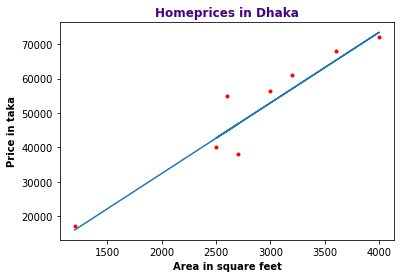

In [72]:
plt.plot(x,regn.predict(x))
plt.scatter(df['area'],df['price'],color='red',marker='.')
plt.xlabel('Area in square feet',weight='bold')
plt.ylabel('Price in taka',weight='bold')
plt.title('Homeprices in Dhaka',color='indigo',weight='bold')


# **Error Calculation**

In [73]:
from sklearn.metrics import mean_squared_error , mean_absolute_error


In [74]:
mse = mean_squared_error(df['price'], df['predicted_PRICE'])

In [75]:
mse

28568507.779544085

In [76]:
df['loss']= df['price'] - df['predicted_PRICE']


In [77]:
df

,area,price,predicted_PRICE,loss
0,2600,55000,44737.417943,10262.582057
1,3000,56500,52956.236324,3543.763676
2,3200,61000,57065.645514,3934.354486
3,3600,68000,65284.463895,2715.536105
4,4000,72000,73503.282276,-1503.282276
5,2500,40000,42682.713348,-2682.713348
6,2700,38000,46792.122538,-8792.122538
7,1200,17000,15971.553611,1028.446389


In [78]:
mae = mean_absolute_error(df['price'], df['predicted_PRICE'])

In [79]:
mae

4307.85010940919

In [80]:
mae1=sum(abs(df['loss']))/len(df['loss'])

In [81]:
mae1

4307.85010940919

In [82]:
import math

In [83]:
math.sqrt(mse)

5344.951616202347

# **Plot Prediction with Best Fit line**

Text(0.5, 1.0, 'Homeprices in Dhaka')

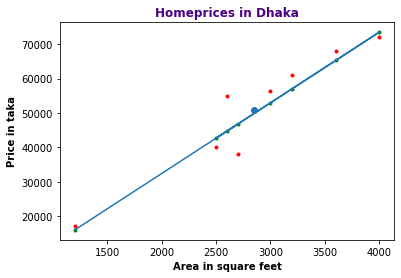

In [84]:
plt.plot(x,regn.predict(x))
plt.scatter(x.mean(),y.mean())
plt.scatter(df['area'],df['price'],color='red',marker='.')
plt.scatter(df['area'],regn.predict(x),color='green',marker='.')
plt.xlabel('Area in square feet',weight='bold')
plt.ylabel('Price in taka',weight='bold')
plt.title('Homeprices in Dhaka',color='indigo',weight='bold')

# *Accuracy Test*

In [85]:
regn.score(x,y)

0.9015820270005345

In [86]:
from sklearn.metrics import r2_score
r2_score(y,regn.predict(x))

0.9015820270005345

# **Import Youtube Video**

In [87]:
from IPython.display import Audio, Image, Video, YouTubeVideo

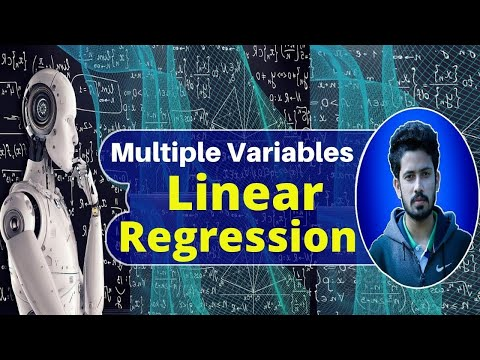

In [88]:
vid=YouTubeVideo("tLkAQWYauNs")
display(vid)

# **Multiple Linear Regression**

In [89]:
df2=pd.read_excel('cardata.xlsx')

In [90]:
df2

,Speed,Car Age,Experience,Risk
0,200,15,5.0,85
1,90,17,13.0,20
2,165,12,4.0,93
3,110,20,NaN,60
4,140,5,3.0,82
5,115,2,8.0,10


In [91]:
zz=df2.Experience.median()
zz

5.0

In [92]:
df2.Experience=df2.Experience.fillna(zz)

In [93]:
df2

,Speed,Car Age,Experience,Risk
0,200,15,5.0,85
1,90,17,13.0,20
2,165,12,4.0,93
3,110,20,5.0,60
4,140,5,3.0,82
5,115,2,8.0,10


In [94]:
reg=LinearRegression()

In [95]:
reg.fit(df2[['Speed','Car Age','Experience']],df2[['Risk']])

LinearRegression()

In [96]:
reg.predict([[160,10,5]])

array([[71.37146872]])

In [97]:
reg.predict([[165,12,4]])

array([[82.45321522]])

In [98]:
reg.score(df2[['Speed','Car Age','Experience']],df2[['Risk']])

0.8753123566971533

In [100]:
pd.read_csv('https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/blood.csv')

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0
